In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from implementations import *
from utilitaries import *

Data loading
===

In [2]:
from proj1_helpers import *

labels, raw_data, indices = load_csv_data('train.csv', sub_sample=False)
labels_te, raw_data_te, indices_te = load_csv_data('test.csv', sub_sample=False)
# where b(background) -> -1 and s(signal) -> 1

n_samples, n_raw_features = np.shape(raw_data)
n_samples_te, n_raw_features_te = np.shape(raw_data_te)
print(f'Dimension train: {np.shape(raw_data)}')
print(f'Dimension test: {np.shape(raw_data_te)}')

Dimension train: (250000, 30)
Dimension test: (568238, 30)


Data processing
===

Standardization

In [3]:
nan_data = meaningless_to_nan(raw_data)
std_data = standardize(nan_data)

nan_data_te = meaningless_to_nan(raw_data_te)
std_data_te= standardize(nan_data_te)

PCA

Kept features: 12
Shape of PCA train data: (250000, 12)
Kept features: 12
Shape of PCA test data: (568238, 12)


(<matplotlib.axes._subplots.AxesSubplot at 0x10a693470>,
 [<matplotlib.lines.Line2D at 0x17608bb00>])

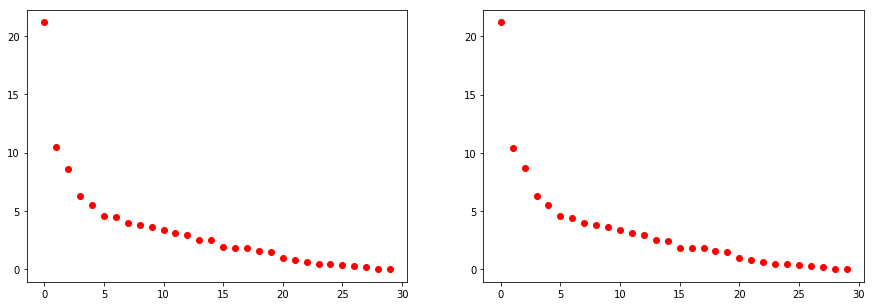

In [4]:
#Principal component analysis - would replace high correlation filter

variance_threshold = 0.80 # need to be tested

plt.figure(figsize=(15,5))

eig_val, eig_vec, var = PCA(std_data, variance_threshold)
PCA_data = std_data.dot(eig_vec) #i.e. decorrelated data
print('Shape of PCA train data:', np.shape(PCA_data))
plt.subplot(1,2,1), plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], var, 'ro')

eig_val_te, eig_vec_te, var_te = PCA(std_data_te, variance_threshold)
PCA_data_te = std_data_te.dot(eig_vec_te) #i.e. decorrelated data
print('Shape of PCA test data:', np.shape(PCA_data_te))
plt.subplot(1,2,2), plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], var_te, 'ro')

Logitic Regression
===

In [ ]:
labels = np.expand_dims(labels, axis=1) 
lambda_= 0.0001
initial_w = np.zeros((12,1))
max_iters = 2
gamma = 0.01
w, loss = reg_logistic_regression(labels,PCA_data[0:100,:], lambda_, initial_w ,max_iters,gamma)
print(w)

Cross Validation
===

In [7]:
#degrees = range(5)
lambdas = np.logspace(-4, -1, 5)
k_fold = 4
seed = 27

#k_idx = build_k_indices(labels, k_fold, seed)

#loss_tr = np.ones((len(degrees),len(lambdas)))
loss_tr = np.ones(len(lambdas))
#loss_te = np.ones((len(degrees),len(lambdas)))
loss_te = np.ones(len(lambdas))
#for degree_idx in range(len(degrees)):
    #degree = degrees[degree_idx]
    #if degree == 0:
labels = np.expand_dims(labels, axis=1) 
        #print(labels.shape)
#for lambda_idx, lambda_ in enumerate(lambdas):
#    loss_tr[lambda_idx], loss_te[lambda_idx] = cross_validation(labels, PCA_data, k_idx, k_fold, lambda_)
#    print(lambda_idx)
#print(loss_tr, loss_te)

In [ ]:
best_HP_idx = np.unravel_index(np.argmin(loss_te),np.shape(loss_te))
best_degree = degrees[best_HP_idx[0]]
best_lambda = lambdas[best_HP_idx[1]]
print('Best degree = ', best_degree, '  Best lambda = ', best_lambda)

In [50]:
reduced_data_poly = build_poly(PCA_data, 8)
reduced_data_poly_te = build_poly(PCA_data_te, 8)

weights, loss = ridge_regression(labels, reduced_data_poly, best_lambda)

y_pred = predict_labels(weights, reduced_data_poly_te)
print(np.shape(y_pred), np.shape(indices_te))
create_csv_submission(indices_te, y_pred, 'submission_PCA_3.csv')

(568238,) (568238,)
